Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the tables
stations = pd.read_csv('info_on_stations.csv')
fourSquare = pd.read_csv('info_on_business_FQ.csv')
yelp = pd.read_csv('info_on_business_yelp.csv')


Analysing the tables

In [85]:

stations.isnull().sum()
stations.describe()

,latitude,longitude,nbr of bikes
count,714.000000,714.000000,714.000000
mean,45.522564,-73.596580,8.456583
std,0.038790,0.046503,6.108091
min,45.415747,-73.758227,0.000000
25%,45.501102,-73.618201,3.000000
50%,45.524318,-73.583810,7.000000
75%,45.545156,-73.566603,12.000000
max,45.651406,-73.490113,33.000000


It has no NULL values and the spread of the numerical column "nbr of bikes" is consistent (small standard deviation). the latitude and longitude are good since the requests to the servers did not return error on geo location.

In [94]:
fourSquare.isnull().sum()
fourSquare.describe()

,latitude,longitude,rating,distance,price
count,21751.000000,21751.000000,21751.000000,21751.000000,21751.000000
mean,45.522198,-73.594023,5.343405,860.001885,1.384580
std,0.033950,0.042369,3.795946,7028.991247,0.890666
min,45.415747,-73.758227,0.000000,3.000000,0.000000
25%,45.502054,-73.614708,0.000000,453.000000,1.000000
50%,45.523740,-73.582596,7.600000,670.000000,1.000000
75%,45.543102,-73.567374,8.400000,850.000000,2.000000
max,45.651406,-73.490113,9.400000,232785.000000,4.000000


Same as the above table

In [95]:
yelp.isnull().sum()
yelp.describe()

,latitude,longitude,rating,distance,review_count
count,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000
mean,45.523088,-73.595707,4.378337,814.119002,20.759858
std,0.036691,0.045235,0.959026,1083.550931,49.136393
min,45.415747,-73.758227,0.000000,8.129550,0.000000
25%,45.502054,-73.617012,4.500000,533.108044,4.000000
50%,45.524518,-73.583680,4.500000,779.607758,8.000000
75%,45.544867,-73.566583,5.000000,979.739623,18.000000
max,45.651406,-73.490113,5.000000,39892.823093,720.000000


Same as above

In [354]:
#rounding the latitude and longitude
n = 4
fourSquare['latitude'] = fourSquare['latitude'].round(decimals = n)
fourSquare['longitude'] = fourSquare['longitude'].round(decimals = n)
yelp['latitude'] = yelp['latitude'].round(decimals = n)
yelp['longitude'] = yelp['longitude'].round(decimals = n)
stations['latitude'] = stations['latitude'].round(decimals =n)
stations['longitude'] = stations['longitude'].round(decimals =n)

#extracting data from tables
nbr_poi_fq = fourSquare.groupby(['latitude','longitude'])['name'].count()
nbr_poi_yelp = yelp.groupby(['latitude','longitude'])['name'].count()
avg_distance_fq = fourSquare.groupby(['latitude','longitude'])['distance'].mean()
avg_distance_yelp = yelp.groupby(['latitude','longitude'])['distance'].mean()
avg_rating_fq = fourSquare.groupby((['latitude','longitude']))['rating'].mean()
avg_rating_yelp = yelp.groupby(['latitude','longitude'])['rating'].mean()

#grouping into one single table
table1 = pd.DataFrame()
table1['nbr of POI FQ'] = nbr_poi_fq 
table1['nbr of POI yelp'] = nbr_poi_yelp
table1['avg distance FQ'] = avg_distance_fq
table1['avg distance yelp'] = avg_distance_yelp
table1['avg rating FQ'] = avg_rating_fq
table1['avg rating yelp'] = avg_rating_yelp

table2 = stations[['latitude', 'longitude', 'station name', 'nbr of bikes']]

#resulting table
table = pd.merge(table2,table1, on=['latitude','longitude'])
table.head(5)


,latitude,longitude,station name,nbr of bikes,nbr of POI FQ,nbr of POI yelp,avg distance FQ,avg distance yelp,avg rating FQ,avg rating yelp
0,45.6175,-73.6060,Cégep Marie-Victorin,0,20,18,692.350000,812.686887,0.370000,1.833333
1,45.5169,-73.5643,Gare d'autocars de Montréal (Berri / Ontario),6,35,20,585.142857,701.572503,8.388571,4.800000
2,45.5415,-73.5650,Molson / William-Tremblay,3,30,20,645.966667,865.942248,3.556667,4.650000
3,45.5062,-73.7112,Ateliers municipaux de St-Laurent (Cavendish /...,5,16,20,862.312500,2273.415536,1.218750,3.150000
4,45.5130,-73.6825,Place Rodolphe-Rousseau (Gohier / Édouard-Laurin),0,33,20,394.666667,585.462381,2.248485,4.500000


Explanation :
The (latitude and longitude) are not from the same server. Therefore, they had to be rounded to prevent data lost. Notice that (latitude, longitude) from FourSquare and Yelp server match perfectly. But they are different from those collected from citybik. Without rounding, there is only 63/714 match that result in 91% of data loss.

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [348]:
#checking for missing values
table.isnull().sum()

latitude             0
longitude            0
station name         0
nbr of bikes         0
nbr of POI FQ        0
nbr of POI yelp      0
avg distance FQ      0
avg distance yelp    0
avg rating FQ        0
avg rating yelp      0
dtype: int64

In [349]:
#checking for type of data
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           714 non-null    float64
 1   longitude          714 non-null    float64
 2   station name       714 non-null    object 
 3   nbr of bikes       714 non-null    int64  
 4   nbr of POI FQ      714 non-null    int64  
 5   nbr of POI yelp    714 non-null    int64  
 6   avg distance FQ    714 non-null    float64
 7   avg distance yelp  714 non-null    float64
 8   avg rating FQ      714 non-null    float64
 9   avg rating yelp    714 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 61.4+ KB


In [350]:
#checking for wrong entries
for col in table.columns:
    print('{} : {}'.format(col,table[col].unique()))

latitude : [45.6175 45.5169 45.5415 45.5062 45.513  45.5147 45.5223 45.5669 45.5481
 45.4479 45.5129 45.4295 45.5233 45.5337 45.5372 45.5284 45.4671 45.5532
 45.5649 45.5057 45.5102 45.5269 45.6514 45.6062 45.5071 45.5064 45.5216
 45.4575 45.4726 45.6059 45.4391 45.4719 45.5534 45.5741 45.5972 45.5598
 45.5549 45.5683 45.4366 45.4381 45.4568 45.4892 45.5225 45.509  45.504
 45.4905 45.5319 45.4805 45.4912 45.594  45.5458 45.5176 45.5132 45.4398
 45.6027 45.6109 45.503  45.4384 45.4461 45.4972 45.5137 45.4954 45.4385
 45.4328 45.4358 45.4157 45.4163 45.4561 45.6096 45.52   45.5599 45.4469
 45.5905 45.5794 45.5201 45.5259 45.5617 45.485  45.4453 45.5019 45.4251
 45.4375 45.4261 45.444  45.5078 45.5054 45.4928 45.4975 45.5076 45.5042
 45.5383 45.4897 45.5109 45.46   45.4669 45.5024 45.4361 45.5568 45.4434
 45.4177 45.5605 45.5278 45.5983 45.5352 45.4977 45.5333 45.584  45.5724
 45.5865 45.6084 45.5995 45.5877 45.5832 45.514  45.4721 45.5925 45.5159
 45.5597 45.5068 45.5027 45.5237 45.5281 

<Axes: >

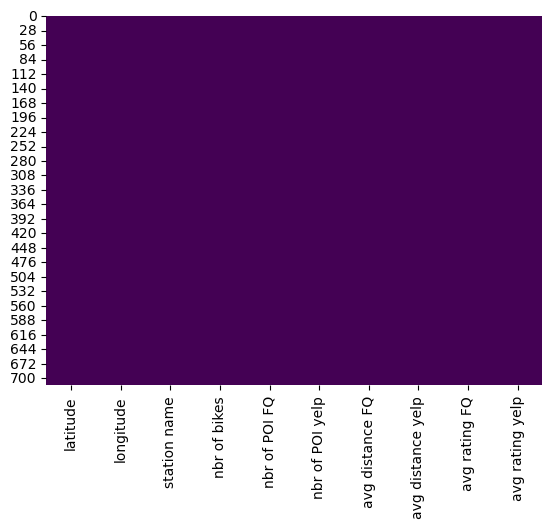

In [351]:
#visualizing the missing values
sns.heatmap(table.isnull(),cbar=False,cmap='viridis')


The tests above already shows that there are no missing values

C:\Users\ander\AppData\Local\Temp\ipykernel_15400\848681521.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(table.corr(),cbar=True,annot=True,cmap='Blues')


<Axes: >

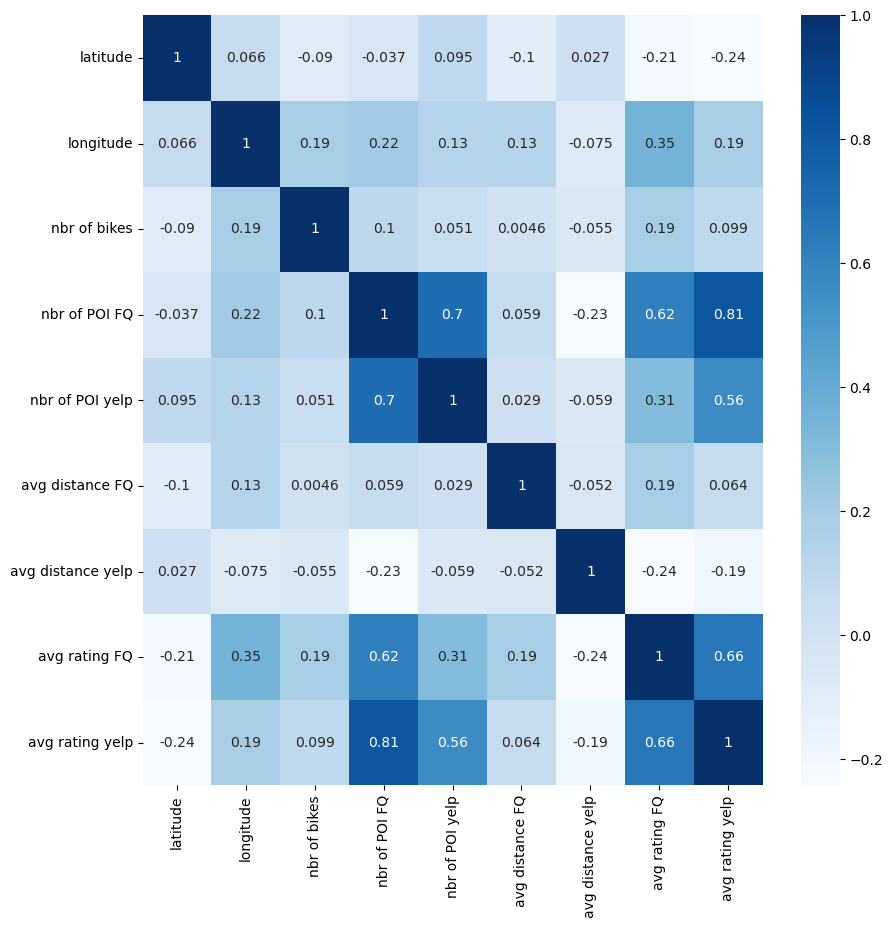

In [352]:
#checking for patters
plt.figure(figsize=(10,10))
sns.heatmap(table.corr(),cbar=True,annot=True,cmap='Blues')


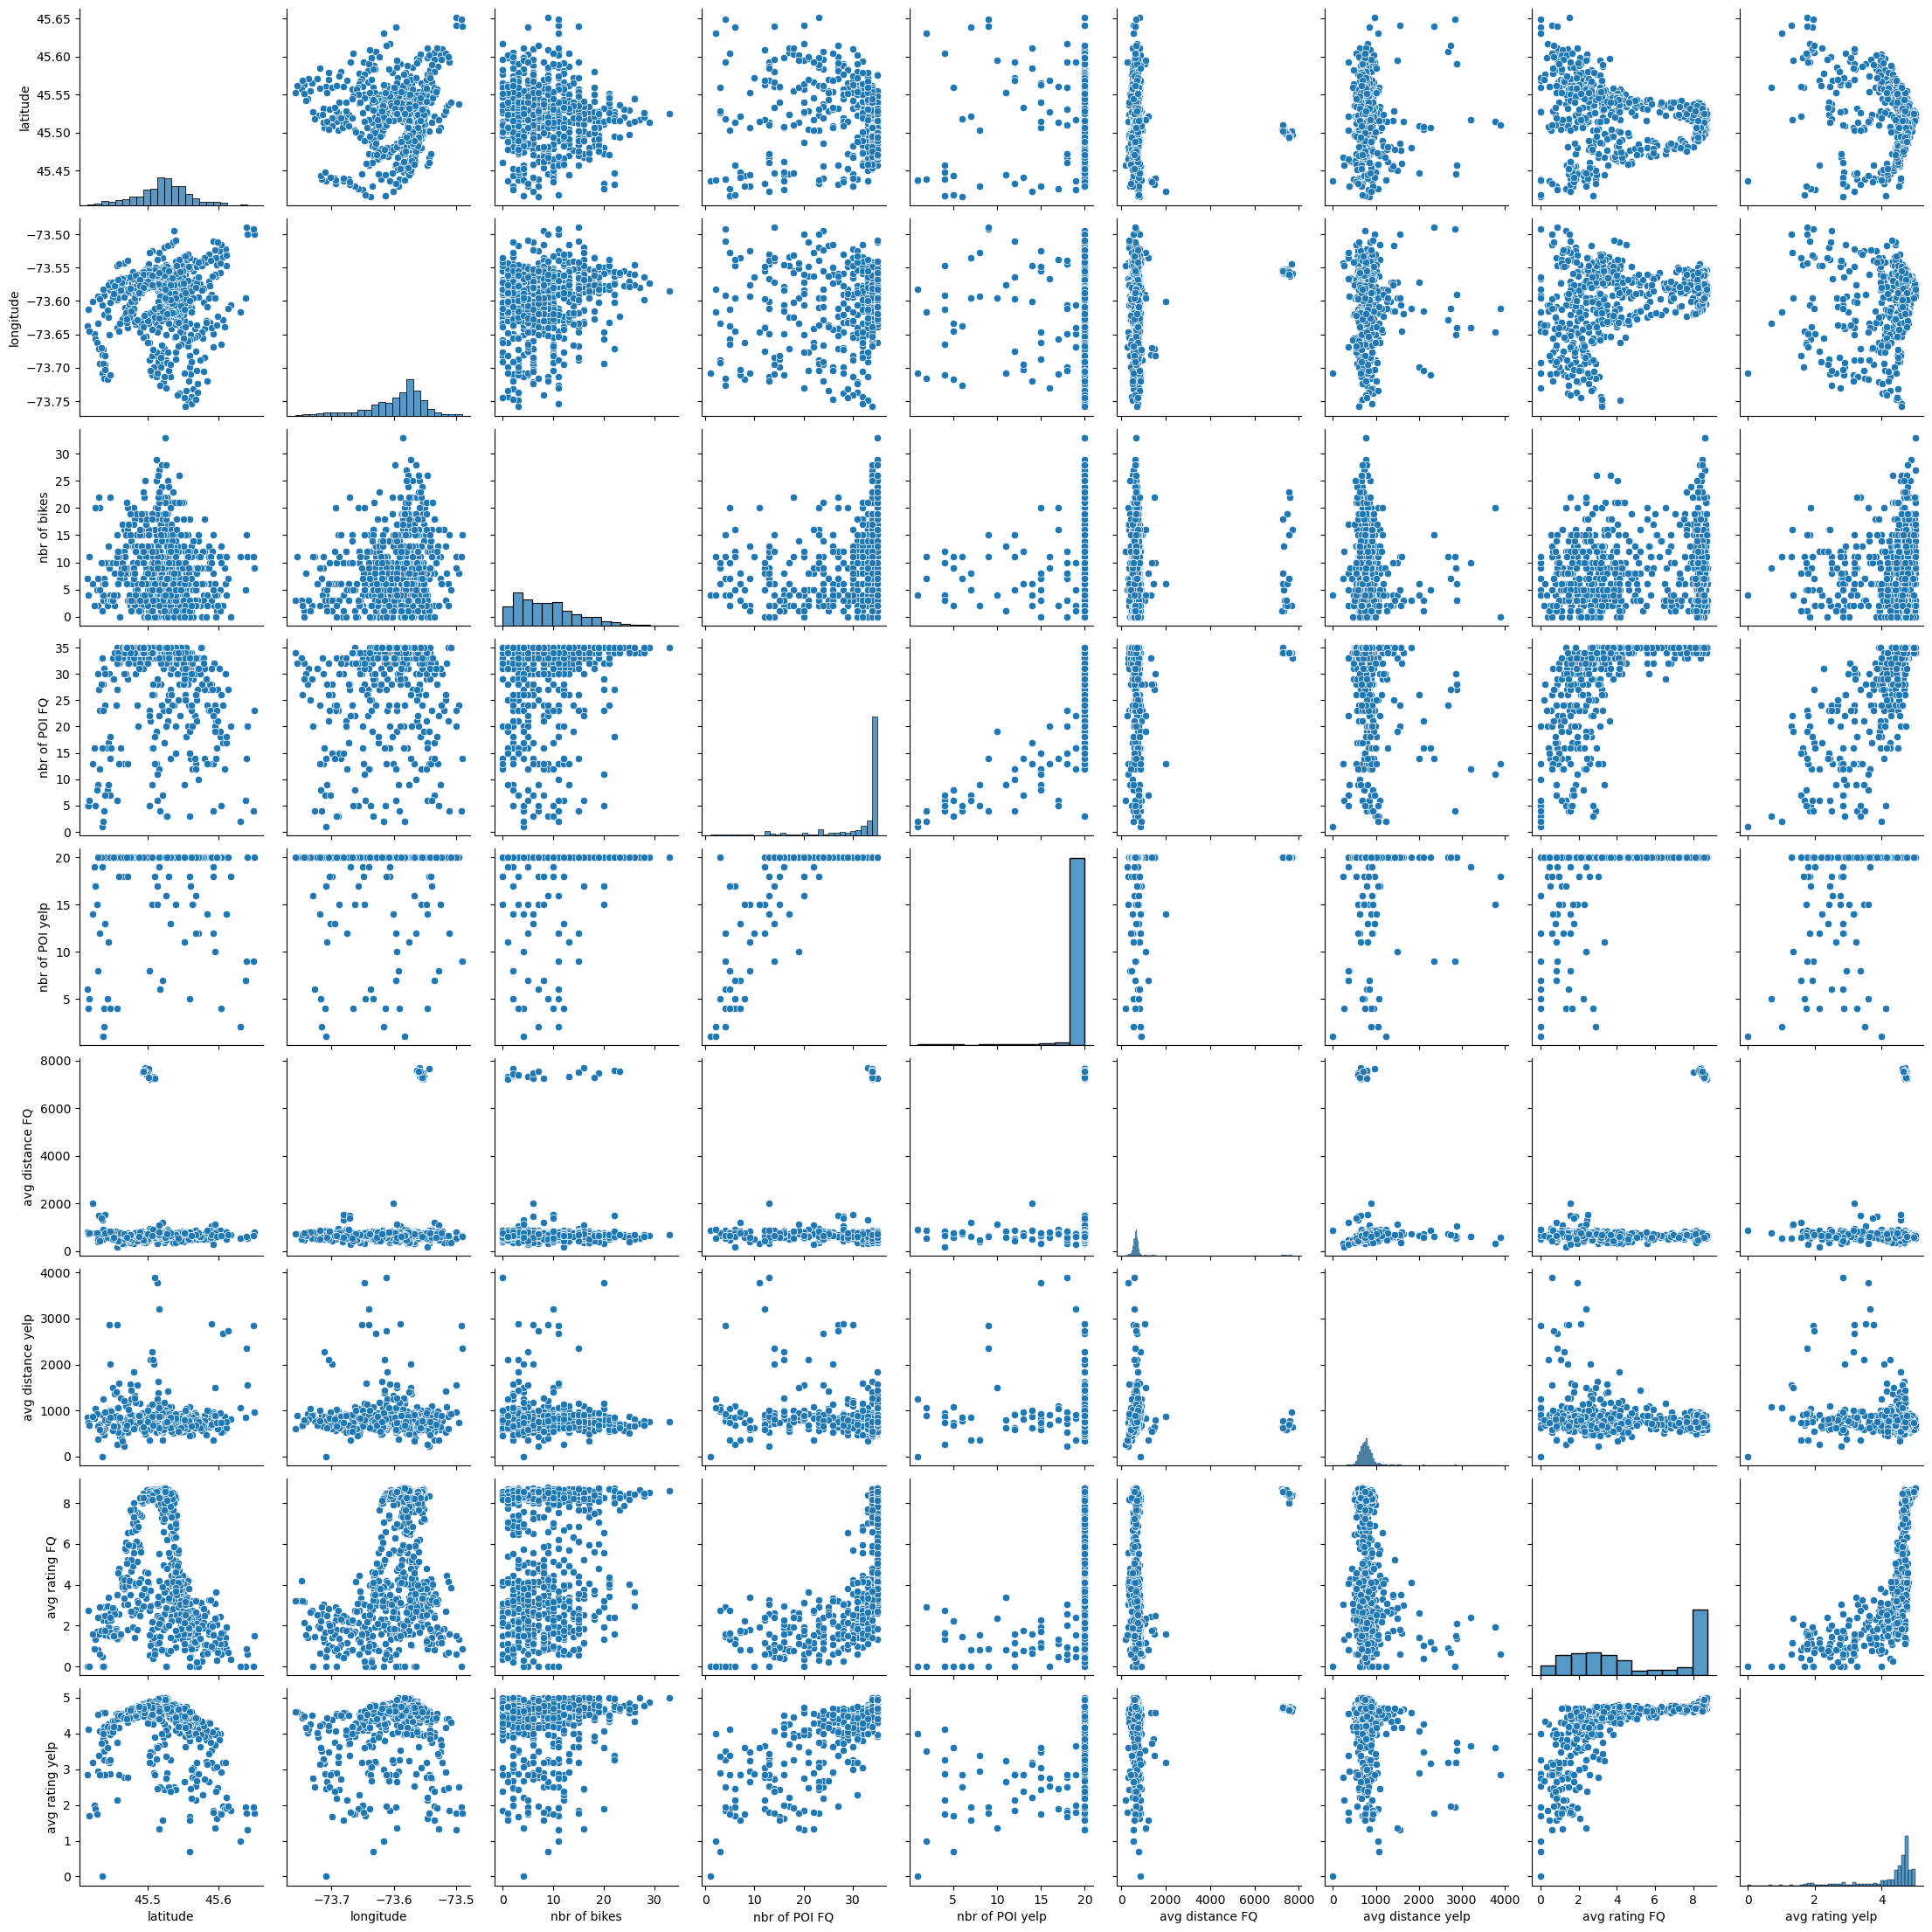

In [368]:
sns.pairplot(table)

Threre is correlation between the data from Four Square and Yelp. It is logic since the data is related to the same subject of study. The number of bikes available on each station doesn't have much correlation with the collected variable. Let's buitd the model on the highest correlation that is:
nbr of bikes / average rating from FQ = 0.19

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [366]:
import sqlite3
#saving the data in a SQL database
conn = sqlite3.connect("bike-stations-analysis.db")
fourSquare.to_sql(name='FourSquareInfos', con=conn)
yelp.to_sql(name='YelpInfos', con=conn)
stations.to_sql(name='stations_infos', con=conn)
table.to_sql(name='analysis_table', con=conn)
conn.close()

Look at the data before and after the join to validate your data.

In [358]:
#table stations before
conn = sqlite3.connect("bike-stations-analysis.db")
message = pd.read_sql("""SELECT *
                        FROM stations_infos
                     """, conn
                     )
message.head(10)

,index,latitude,longitude,nbr of bikes,station name,city,company name
0,0,45.6175,-73.6060,0,Cégep Marie-Victorin,"Montréal, QC","Motivate International, Inc."
1,1,45.5169,-73.5643,6,Gare d'autocars de Montréal (Berri / Ontario),"Montréal, QC","Motivate International, Inc."
2,2,45.5415,-73.5650,3,Molson / William-Tremblay,"Montréal, QC","Motivate International, Inc."
3,3,45.5062,-73.7112,5,Ateliers municipaux de St-Laurent (Cavendish /...,"Montréal, QC","Motivate International, Inc."
4,4,45.5130,-73.6825,0,Place Rodolphe-Rousseau (Gohier / Édouard-Laurin),"Montréal, QC","Motivate International, Inc."
5,5,45.5147,-73.6914,0,Centre des loisirs (Tassé / Grenet),"Montréal, QC","Motivate International, Inc."
6,6,45.5223,-73.7217,6,Parc Marlborough (Beauzèle / Robichaud),"Montréal, QC","Motivate International, Inc."
7,7,45.5669,-73.6410,8,Champdoré / de Lorimier,"Montréal, QC","Motivate International, Inc."
8,8,45.5481,-73.6243,0,Parc Villeray (Christophe-Colomb / Jarry),"Montréal, QC","Motivate International, Inc."
9,9,45.4479,-73.5838,4,Beurling / Godin,"Montréal, QC","Motivate International, Inc."


In [367]:
conn = sqlite3.connect("bike-stations-analysis.db")
message = pd.read_sql("""SELECT *
                        FROM analysis_table
                     """, conn
                     )
message.head(10)

,index,latitude,longitude,station name,nbr of bikes,nbr of POI FQ,nbr of POI yelp,avg distance FQ,avg distance yelp,avg rating FQ,avg rating yelp
0,0,45.6175,-73.6060,Cégep Marie-Victorin,0,20,18,692.350000,812.686887,0.370000,1.833333
1,1,45.5169,-73.5643,Gare d'autocars de Montréal (Berri / Ontario),6,35,20,585.142857,701.572503,8.388571,4.800000
2,2,45.5415,-73.5650,Molson / William-Tremblay,3,30,20,645.966667,865.942248,3.556667,4.650000
3,3,45.5062,-73.7112,Ateliers municipaux de St-Laurent (Cavendish /...,5,16,20,862.312500,2273.415536,1.218750,3.150000
4,4,45.5130,-73.6825,Place Rodolphe-Rousseau (Gohier / Édouard-Laurin),0,33,20,394.666667,585.462381,2.248485,4.500000
5,5,45.5147,-73.6914,Centre des loisirs (Tassé / Grenet),0,33,20,580.212121,798.065592,2.500000,4.550000
6,6,45.5223,-73.7217,Parc Marlborough (Beauzèle / Robichaud),6,31,20,721.129032,791.150009,1.993548,3.900000
7,7,45.5669,-73.6410,Champdoré / de Lorimier,8,22,20,782.909091,893.988920,0.922727,2.900000
8,8,45.5481,-73.6243,Parc Villeray (Christophe-Colomb / Jarry),0,35,20,689.600000,765.028954,4.037143,4.650000
9,9,45.4479,-73.5838,Beurling / Godin,4,16,20,838.375000,1002.174767,1.900000,3.975000


I made analysis on the join above. 